In [1]:
import pandas as pd

In [2]:
engdf = pd.read_csv("engine_data.csv")


In [3]:
from contextlib import contextmanager
from csv import writer

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
def engine_simple(val):
    val = str(val)
    engine_simple = val.split()
    val = engine_simple[0]
    return val

engdf.ENGINE = engdf.ENGINE.apply(engine_simple)
engdf.ENGINE

def redbull_checker(val):
    if val == "Honda" or val == "TAG" or val == "Red":
        val = "RB"
    return val






In [5]:
engdf.ENGINE = engdf.ENGINE.apply(redbull_checker)

engdf.ENGINE.unique()


engine_dummies = pd.get_dummies(engdf.ENGINE)

engdf = pd.concat([engdf, engine_dummies], axis=1)

engdf.drop(columns=['CAR'])

#print(engdf2)

,Unnamed: 0,SEQ,YEAR,EVENT,DRIVER,ENGINE,GRID POS,RACE,Team Name,Ferrari,Mercedes,RB,Renault,nan
0,0,601,2023,Las Vegas Grand Prix,George Russell,Mercedes,3,8,mercedes,0,1,0,0,0
1,1,501,2021,Russian Grand Prix,Valtteri Bottas,Mercedes,16,5,mercedes,0,1,0,0,0
2,2,502,2021,Turkish Grand Prix,Valtteri Bottas,Mercedes,1,1,mercedes,0,1,0,0,0
3,3,503,2021,Turkish Grand Prix,Lewis Hamilton,Mercedes,11,5,mercedes,0,1,0,0,0
4,4,504,2021,United States Grand Prix,Lewis Hamilton,Mercedes,2,2,mercedes,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4303,96,2022,São Paulo Grand Prix,Sebastian Vettel,nan,9,11,aston-martin,0,0,0,0,1
4304,4304,97,2022,Abu Dhabi Grand Prix,Lance Stroll,Mercedes,14,8,aston-martin,0,1,0,0,0
4305,4305,98,2022,Abu Dhabi Grand Prix,Sebastian Vettel,Mercedes,9,10,aston-martin,0,1,0,0,0
4306,4306,99,2023,Bahrain Grand Prix,Fernando Alonso,Mercedes,5,3,aston-martin,0,1,0,0,0


In [6]:
engdf.head()
engdf.ENGINE

0       Mercedes
1       Mercedes
2       Mercedes
3       Mercedes
4       Mercedes
          ...   
4303         nan
4304    Mercedes
4305    Mercedes
4306    Mercedes
4307    Mercedes
Name: ENGINE, Length: 4308, dtype: object

In [7]:
print(engdf["Team Name"].unique())
print(engdf["YEAR"].unique())


engdf['Team Name'] = engdf['Team Name'].replace('bwt-racing-point-f1-team', 'aston-martin')
engdf['Team Name'] = engdf['Team Name'].replace('force-india', 'aston-martin')

engdf['Team Name'] = engdf['Team Name'].replace('lotus-f1', 'alpine')
engdf['Team Name'] = engdf['Team Name'].replace(['sauber'], 'alfa-romeo')
#group data by product and display sales as line chart

print(engdf["Team Name"].unique())





['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'force-india' 'lotus-f1' 'marussia' 'sauber' 'caterham' 'haas'
 'bwt-racing-point-f1-team' 'alfa-romeo' 'scuderia-alphatauri-honda'
 'alpine' 'aston-martin']
[2023 2021 2022 2019 2020 2016 2017 2018 2014 2015]
['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'aston-martin' 'alpine' 'marussia' 'alfa-romeo' 'caterham' 'haas'
 'scuderia-alphatauri-honda']


In [8]:
print(engdf.columns)

Index(['Unnamed: 0', 'SEQ', 'YEAR', 'EVENT', 'DRIVER', 'CAR', 'ENGINE',
       'GRID POS', 'RACE', 'Team Name', 'Ferrari', 'Mercedes', 'RB', 'Renault',
       'nan'],
      dtype='object')


In [9]:
points = pd.read_csv("final_data.csv")
print(points.columns)
engdf = engdf.rename(columns={"YEAR": "Year", "Team Name": "Team"})


#points['Year'].astype('int')
points['Team'] = points['Team'].replace('bwt-racing-point-f1-team', 'aston-martin')
points['Team'] = points['Team'].replace('force-india', 'aston-martin')

points['Team'] = points['Team'].replace('lotus-f1', 'alpine')
points['Team'] = points['Team'].replace(['sauber'], 'alfa-romeo')

#print(points)
#engdf = engdf.merge(points[['W', 'PD','PTS','WC']], left_on=['Year','Team'], right_on='Team')
#print(points.columns)
#print(engdf.columns)
points = points.sort_values(by=['Year'])
print(points)
points.set_index('Year', inplace=True)
#print(engdf)




Index(['Unnamed: 0', 'Team', 'Year', 'ST', 'W', 'PD', 'PP', 'FL', 'BF', 'BG',
       'PTS', 'WC', 'CAR', 'ENGINE'],
      dtype='object')
    Unnamed: 0             Team  Year  ST   W  PD  PP  FL  BF  BG    PTS   WC  \
14          14        ferrari-2  2014  19   0   2   0   1   2   4  216.0  4th   
24          24     aston-martin  2014  19   0   1   0   1   3   4  155.0  6th   
41          41          mclaren  2014  19   0   2   0   0   2   3  181.0  5th   
61          61  red-bull-racing  2014  19   3  12   0   3   1   2  405.0  2nd   
51          51         mercedes  2014  19  16  31  18  12   1   1  701.0  1st   
..         ...              ...   ...  ..  ..  ..  ..  ..  ..  ..    ...  ...   
50          50          mclaren  2023  20   0   9   0   2   2   2  282.0  4th   
60          60         mercedes  2023  20   0   7   1   5   2   1  382.0  2nd   
23          23        ferrari-2  2023  20   1   7   6   0   1   1  362.0  3rd   
7            7           alpine  2023  20   0   2   

      Unnamed: 0          Team  ST  W  PD  PP  FL  BF  BG    PTS   WC  \
Year                                                                    
2014          24  aston-martin  19  0   1   0   1   3   4  155.0  6th   
2015          25  aston-martin  19  0   1   0   0   3   4  136.0  5th   
2016          26  aston-martin  21  0   2   0   1   3   2  173.0  4th   
2017          27  aston-martin  20  0   0   0   1   4   3  187.0  4th   
2018          28  aston-martin  12  0   1   0   0   3   6   52.0  7th   
2019          11  aston-martin  21  0   0   0   0   4   5   73.0  7th   
2020          12  aston-martin  17  1   4   1   0   1   1  195.0  4th   
2021           8  aston-martin  22  0   1   0   0   2   5   77.0  7th   
2022           9  aston-martin  22  0   0   0   0   6   5   55.0  7th   
2023          10  aston-martin  20  0   8   0   1   2   2  261.0  5th   

                     CAR                         ENGINE  
Year                                                     
2014   

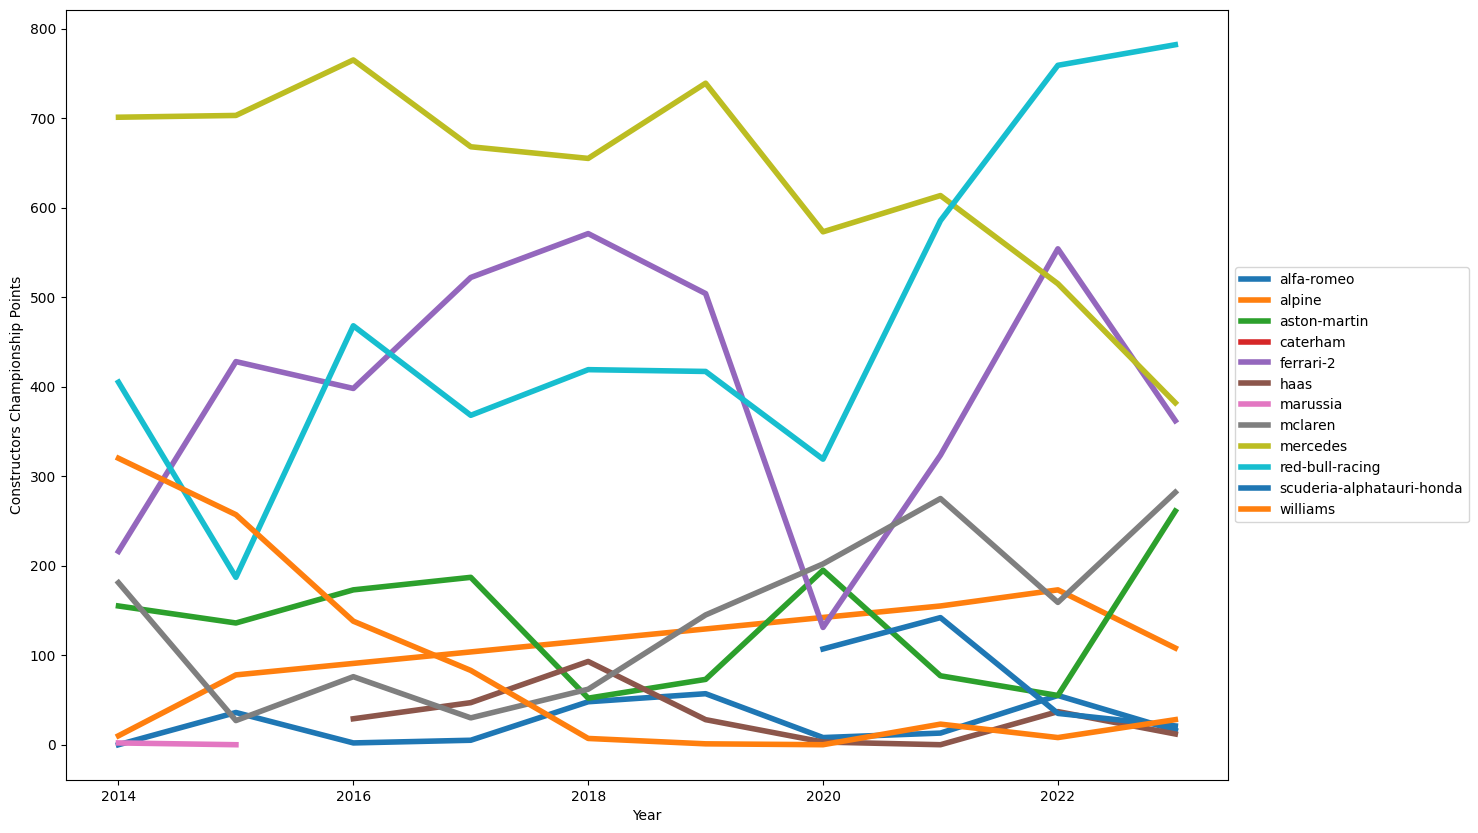

In [10]:
import matplotlib.pyplot as plt

points.groupby('Team')['PTS'].plot(figsize=(15,10),legend=True, ylabel='Constructors Championship Points', linewidth=4.0
                                   )

#group data by product and display sales as line chart
#group data by product and display sales as line chart
print(points[points['Team']=='aston-martin'])
print(points[points['Team']=='alpine'])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [11]:
def champ_points(x):
    try:
        x = int(x)
    except:
        x = 0

    p = [0,25,18,15,12,10,8,6,4,2,1,0]
    if x<11:
        x = p[x]
    else:
        x = p[11]
    return x

engdf['PTS']=engdf['RACE'].apply(champ_points)
print(engdf['PTS'])

0        4
1       10
2       25
3       10
4       18
        ..
4303     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 4308, dtype: int64


In [12]:
engdf['PTS']=engdf['RACE'].apply(champ_points)
print(engdf['PTS'])
Total = engdf.groupby(['Year','Team']).sum('PTS')
print(Total['PTS'])

0        4
1       10
2       25
3       10
4       18
        ..
4303     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 4308, dtype: int64
Year  Team                     
2014  alfa-romeo                     0
      alpine                        18
      aston-martin                 141
      caterham                       0
      ferrari-2                    213
                                  ... 
2023  mclaren                      246
      mercedes                     352
      red-bull-racing              742
      scuderia-alphatauri-honda     17
      williams                      26
Name: PTS, Length: 96, dtype: int64


In [13]:
def champ_points(x):
    try:
        x = int(x)
    except:
        x = 0

    p = [0,25,18,15,12,10,8,6,4,2,1,0]
    if x<11:
        x = p[x]
    else:
        x = p[11]
    return x

engdf['PTS']=engdf['RACE'].apply(champ_points)
print(engdf['PTS'])

Total = engdf.groupby(['Year','Team']).sum()
print(Total['PTS'])

Ferrari = engdf.groupby(['Year','Ferrari']).sum()

Mercedes = engdf.groupby(['Year','Mercedes']).sum()
print(Ferrari['PTS'])

0        4
1       10
2       25
3       10
4       18
        ..
4303     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 4308, dtype: int64
Year  Team                     
2014  alfa-romeo                     0
      alpine                        18
      aston-martin                 141
      caterham                       0
      ferrari-2                    213
                                  ... 
2023  mclaren                      246
      mercedes                     352
      red-bull-racing              742
      scuderia-alphatauri-honda     17
      williams                      26
Name: PTS, Length: 96, dtype: int64
Year  Ferrari
2014  0          1712
      1           217
2015  0          1491
      1           428
2016  0          1622
      1           519
2017  0          1394
      1           616
2018  0          1339
      1           763
2019  0          1520
      1           583
2020  0          1606
      1           142
2021  0          2124


/var/folders/kf/_yvgvkfn4rl4bmbj182rdrmw0000gn/T/ipykernel_38423/2283859447.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total = engdf.groupby(['Year','Team']).sum()
/var/folders/kf/_yvgvkfn4rl4bmbj182rdrmw0000gn/T/ipykernel_38423/2283859447.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ferrari = engdf.groupby(['Year','Ferrari']).sum()
/var/folders/kf/_yvgvkfn4rl4bmbj182rdrmw0000gn/T/ipykernel_38423/2283859447.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sele

# Anna's part

# The merged dataset
- it is the final_data.csv
- but with more columns that are useful for the analysis
- the analysis by teams could be done with this CSV

In [30]:
merged_data = engdf
def win(x):
  try:
    x = int(x)
  except:
    x = 0
  if x == 1:
    x = 1
  else:
    x = 0
  return x

merged_data['W'] = merged_data['RACE'].apply(win)

merged_data.to_csv('merged_data.csv', index=False)

In [15]:
merged_data.head(10)

,Unnamed: 0,SEQ,Year,EVENT,DRIVER,CAR,ENGINE,GRID POS,RACE,Team,Ferrari,Mercedes,RB,Renault,nan,PTS,W
0,0,601,2023,Las Vegas Grand Prix,George Russell,Mercedes F1 W14 E Performance,Mercedes,3,8,mercedes,0,1,0,0,0,4,0
1,1,501,2021,Russian Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,16,5,mercedes,0,1,0,0,0,10,0
2,2,502,2021,Turkish Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,1,1,mercedes,0,1,0,0,0,25,1
3,3,503,2021,Turkish Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,11,5,mercedes,0,1,0,0,0,10,0
4,4,504,2021,United States Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,2,2,mercedes,0,1,0,0,0,18,0
5,5,505,2021,United States Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,9,6,mercedes,0,1,0,0,0,8,0
6,6,506,2021,Mexican Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,2,2,mercedes,0,1,0,0,0,18,0
7,7,507,2021,Mexican Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,1,15,mercedes,0,1,0,0,0,0,0
8,8,508,2021,Sao Paulo Grand Prix,Lewis Hamilton,Mercedes F1 W12 E Performance,Mercedes,10,1,mercedes,0,1,0,0,0,25,1
9,9,509,2021,Sao Paulo Grand Prix,Valtteri Bottas,Mercedes F1 W12 E Performance,Mercedes,1,3,mercedes,0,1,0,0,0,15,0


# Dataset description
- Unnamed: row nr
- SEQ: sequence, index
- Year: This is the year
- EVENT: where the race takes place
- DRIVER: Name of the driver
- CAR: The name of the car
- ENGINE: Engine a team is using
- GRID POS: Starting position for the race/Qualifying position
- RACE: Finishing Position
- Team: name of the team
- Ferrari: Ferrari Engine dummy 0 or 1
- Mercedes: Merces Engine dummy 0 or 1
- RB: Red Bull Engine dummy 0 or 1
- Renault: ranult engine dummy 0 or 1
- PTS: Points from the race
- W: Win dummy 0 or 1

# VISUALISATIONS that show facts about the teams that use Mercedes engines, which are the winning dominant engines.

We can create some interesting visualizations focusing on teams using Mercedes engines. Here are a few ideas:

1. Number of Wins per Team Using Mercedes Engines Over Years: This will show the performance of teams using Mercedes engines in terms of wins over different years.

2. Correlation Between Grid Position and Final Race Position: This will explore how starting positions (grid positions) correlate with the final race positions for teams using Mercedes engines.

3. Total Points per Team Using Mercedes Engines Across Years: This will display the total points earned by each team using Mercedes engines over the years.

## Visualization 1: Number of Wins per Team Using Mercedes Engines Over Years

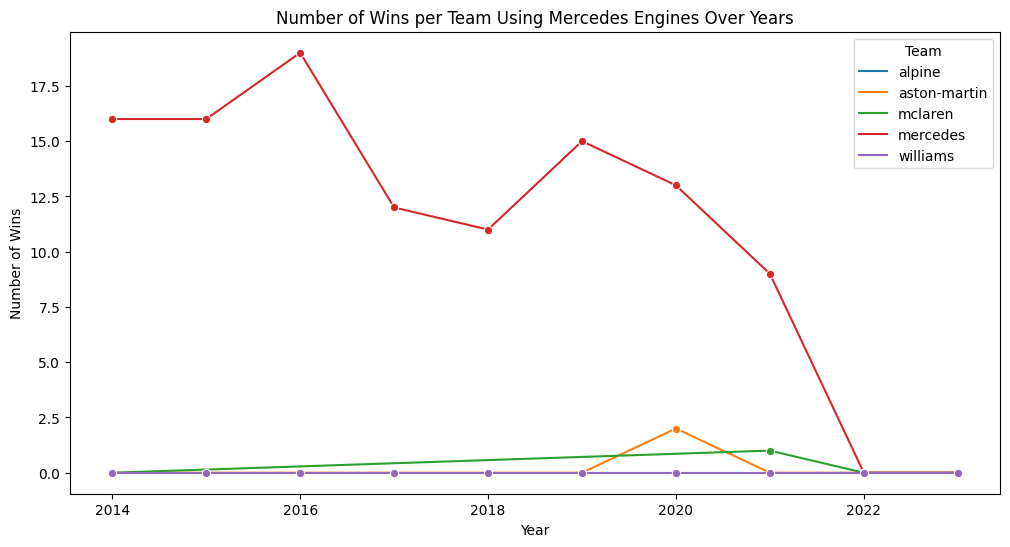

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data for teams using Mercedes engines, handling NA values in the condition
mercedes_teams = merged_data[merged_data['Mercedes']== True]

# Group by team and year to count wins
wins_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=wins_by_team_year, x='Year', y='W', hue='Team', marker='o')
plt.title('Number of Wins per Team Using Mercedes Engines Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Wins')

# Show the plot
plt.show()


In [17]:
import altair as alt
import pandas as pd

# Filter and group data as before
mercedes_teams = merged_data[merged_data['ENGINE'].str.contains("Mercedes", na=False)]
wins_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()

# Create an Altair chart
mercedes_team_wins_over_time_alt = alt.Chart(wins_by_team_year).mark_line(point=True).encode(
    x='Year:O',
    y='W:Q',
    color='Team:N',
    tooltip=['Team', 'Year', 'W']
).properties(
    title='Number of Wins per Team Using Mercedes Engines Over Years',
    width=600,
    height=400
)

# Display the chart
mercedes_team_wins_over_time_alt

alt.Chart(...)

## Visualization 2: Correlation Between Grid Position and Final Race Position

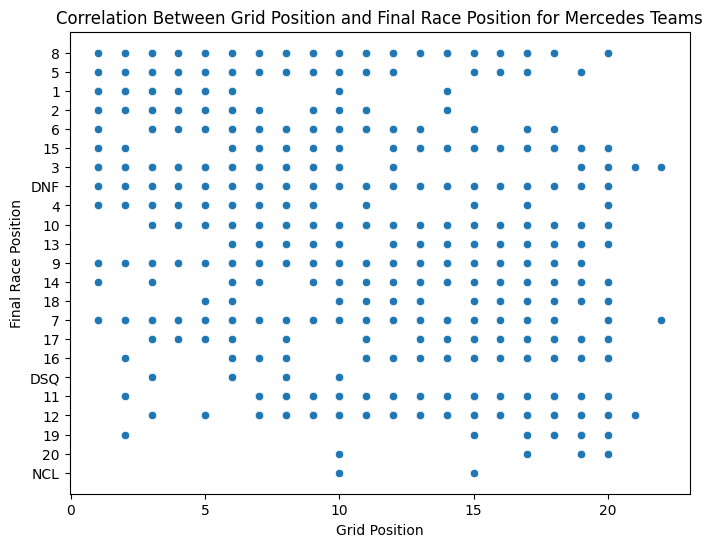

In [18]:
# Plotting the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mercedes_teams, x='GRID POS', y='RACE')
plt.title('Correlation Between Grid Position and Final Race Position for Mercedes Teams')
plt.xlabel('Grid Position')
plt.ylabel('Final Race Position')
plt.show()

In [19]:
# Correlation between grid position and final race position chart
grid_race_corr_chart = alt.Chart(mercedes_teams).mark_point().encode(
    x='GRID POS:Q',
    y='RACE:Q',
    tooltip=['GRID POS', 'RACE']
).properties(
    title='Correlation Between Grid Position and Final Race Position for Mercedes Teams',
    width=600,
    height=400
)

grid_race_corr_chart

alt.Chart(...)

## Visualization 3: Total Points per Team Using Mercedes Engines Across Years

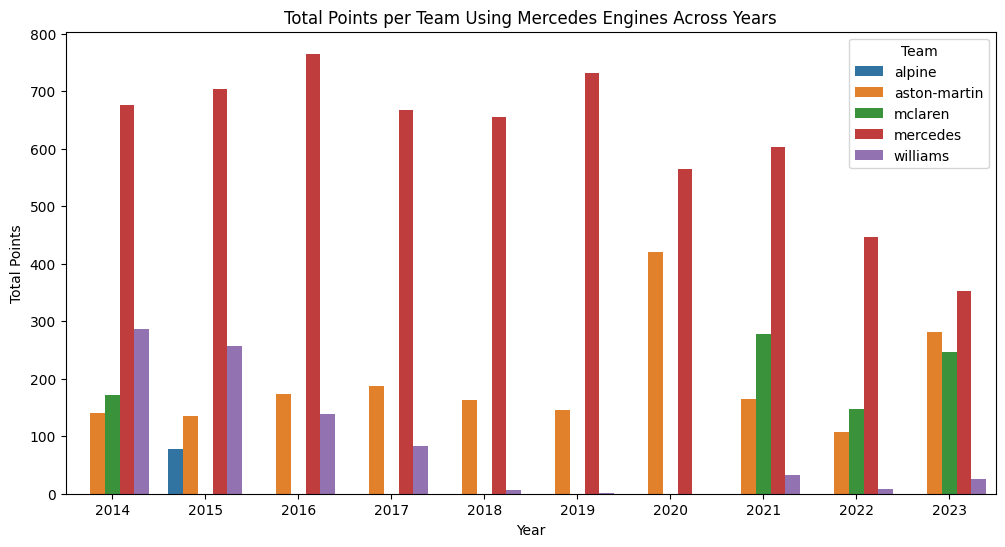

In [20]:
# Group by team and year to sum points
points_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['PTS'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=points_by_team_year, x='Year', y='PTS', hue='Team')
plt.title('Total Points per Team Using Mercedes Engines Across Years')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.show()

In [21]:
# Total points per team and year chart
points_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['PTS'].sum().reset_index()
points_by_team_year_bar_chart = alt.Chart(points_by_team_year).mark_bar().encode(
    x='Year:O',
    y='PTS:Q',
    color='Team:N',
    tooltip=['Team', 'Year', 'PTS']
).properties(
    title='Total Points per Team Using Mercedes Engines Across Years',
    width=600,
    height=400
)

points_by_team_year_bar_chart

alt.Chart(...)

In [22]:
points_by_team_year_area_chart = alt.Chart(points_by_team_year).mark_area(opacity=0.5).encode(
    x='Year:O',
    y='PTS:Q',
    color='Team:N',
    tooltip=['Team', 'Year', 'PTS']
).properties(
    title='Total Points per Team Using Mercedes Engines Across Years',
    width=600,
    height=400
)

points_by_team_year_area_chart

alt.Chart(...)

# Dashboard

In [23]:
import altair as alt
import pandas as pd

# Filter data for teams using Mercedes engines, handling NA values in the condition
mercedes_teams = merged_data[merged_data['ENGINE'].str.contains("Mercedes", na=False)]

# Wins by team and year chart (Line Chart)
wins_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()
mercedes_team_wins_over_time_alt = alt.Chart(wins_by_team_year).mark_line(point=True).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('W:Q', axis=alt.Axis(title='Number of Wins')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['Team', 'Year', 'W']
).properties(
    title='Number of Wins per Team Using Mercedes Engines Over Years'
)

# Correlation between grid position and final race position chart (Scatter Plot)
grid_race_corr_chart = alt.Chart(mercedes_teams).mark_point().encode(
    x=alt.X('GRID POS:Q', axis=alt.Axis(title='Grid Position')),
    y=alt.Y('RACE:Q', axis=alt.Axis(title='Final Race Position')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['GRID POS', 'RACE', 'Team']
).properties(
    title='Grid Position vs Final Race Position for Mercedes Teams'
)

# Total points per team and year chart (Stacked Bar Chart)
points_by_team_year_bar_chart = alt.Chart(mercedes_teams).mark_bar().encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('sum(PTS):Q', axis=alt.Axis(title='Total Points')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['Year', 'sum(PTS)', 'Team']
).properties(
    title='Total Points per Team Using Mercedes Engines Across Years'
)

# Total points per team and year chart (Area Chart)
points_by_team_year_area_chart = alt.Chart(mercedes_teams).mark_area(opacity=0.5).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('sum(PTS):Q', axis=alt.Axis(title='Total Points')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['Year', 'sum(PTS)', 'Team']
).properties(
    title='Total Points Distribution Over Years (Area Chart)'
)

# Concatenate the charts in a dashboard
dashboard = alt.vconcat(
    mercedes_team_wins_over_time_alt,
    grid_race_corr_chart,
    points_by_team_year_bar_chart,
    points_by_team_year_area_chart
).configure_concat(
    spacing=20
)

# Display the dashboard
dashboard

alt.VConcatChart(...)

In [24]:
import altair as alt
import pandas as pd

# Filter data for teams using Mercedes engines, handling NA values in the condition
mercedes_teams = merged_data[merged_data['ENGINE'].str.contains("Mercedes", na=False)]

# Wins by team and year chart (Line Chart)
wins_by_team_year = mercedes_teams.groupby(['Team', 'Year'])['W'].sum().reset_index()
mercedes_team_wins_over_time_alt = alt.Chart(wins_by_team_year).mark_line(point=True).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('W:Q', axis=alt.Axis(title='Number of Wins')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['Team', 'Year', 'W']
).properties(
    title='Number of Wins per Team Using Mercedes Engines Over Years',
    width=600,
    height=400
)

# Correlation between grid position and final race position chart (Scatter Plot)
grid_race_corr_chart = alt.Chart(mercedes_teams).mark_point().encode(
    x=alt.X('GRID POS:Q', axis=alt.Axis(title='Grid Position')),
    y=alt.Y('RACE:Q', axis=alt.Axis(title='Final Race Position')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['GRID POS', 'RACE', 'Team']
).properties(
    title='Grid Position vs Final Race Position for Mercedes Teams',
    width=600,
    height=400
)

# Total points per team and year chart (Stacked Bar Chart)
points_by_team_year_bar_chart = alt.Chart(mercedes_teams).mark_bar().encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('sum(PTS):Q', axis=alt.Axis(title='Total Points')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['Year', 'sum(PTS)', 'Team']
).properties(
    title='Total Points per Team Using Mercedes Engines Across Years',
    width=600,
    height=400
)

# Total points per team and year chart (Area Chart)
points_by_team_year_area_chart = alt.Chart(mercedes_teams).mark_area(opacity=0.5).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('sum(PTS):Q', axis=alt.Axis(title='Total Points')),
    color=alt.Color('Team:N', legend=alt.Legend(title="Teams")),
    tooltip=['Year', 'sum(PTS)', 'Team']
).properties(
    title='Total Points Distribution Over Years (Area Chart)',
    width=600,
    height=400
)

# Concatenate the charts in a dashboard
dashboard = alt.vconcat(
    mercedes_team_wins_over_time_alt,
    grid_race_corr_chart,
    points_by_team_year_bar_chart,
    points_by_team_year_area_chart
).configure_concat(
    spacing=20
)

# Display the dashboard
dashboard

alt.VConcatChart(...)

# Streamlit dashboard

In [25]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 369.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 321.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 311.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 289.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 214.0 kB/s eta 0:00:00a 0:00:01


In [26]:
import streamlit as st

In [27]:
# Display the charts in Streamlit
st.title("Mercedes Engine Performance Analysis")

st.header("Number of Wins per Team Over Years")
st.altair_chart(mercedes_team_wins_over_time_alt, use_container_width=True)

st.header("Grid Position vs Final Race Position")
st.altair_chart(grid_race_corr_chart, use_container_width=True)

st.header("Total Points per Team Across Years")
st.altair_chart(points_by_team_year_bar_chart, use_container_width=True)

st.header("Total Points Distribution Over Years")
st.altair_chart(points_by_team_year_area_chart, use_container_width=True)

2023-12-17 01:20:41.822 
  command:

    streamlit run /Users/annaczarnocka/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()